## Intro


It's not a step-by-step introduction to Python programming, check out Software Carpentry lessons and join one of their workshops if you need it: https://swcarpentry.github.io/python-novice-inflammation/, but:


* Python is meant to resemble a human language
* you can go long way without knowing the details of Python syntax,
* just load some data and start playing with it
* you can start to use Python to replace your excel sheets or statistical package or create simple graphs to share with colleagues
* you can also use python as a programmable calculator

## Using Jupyter lab

* moving around
* editing mode
* executing cells
* getting help
* keyboard shorcuts: 
  - Enter (to enter edito mode), 
  - Shit-Enter (Run), 
  - Esc (enter command mode), 
  - M (markdown, in command mode), 
  - X (remove cell, in command mode)
  - b (command mode, insert new cell below)

## Importing and exploring data

* importing libraries
* pandas
* `read_csv`, `describe`, `head`

In [1]:
import pandas as pd

In [2]:
# url = 'https://raw.githubusercontent.com/btel/2022-09-21-eitn-school/main/eeg_powers.csv'
# url = 'https://bit.ly/3BTE0A1'
url ='eeg_powers.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
df.to_csv('eeg_data_temp.csv', index=True)

Definitions of EEG bands:

* delta 0.5 -- 4 Hz
* alpha 8 -- 13 Hz,  
* beta 13 -- 30 Hz, 
* gamma: > 30 Hz

For details, see my notebook with feature extraction: https://www.kaggle.com/btelenczuk/eeg-extract-features


In [4]:
df.head()

,alpha,delta,beta,gamma,state,channel,subject
0,0.109188,0.121637,0.179848,0.041091,focused,AF3,subject_5
1,0.083879,0.078891,0.074366,0.038357,unfocused,AF3,subject_5
2,0.035458,0.109983,0.039020,0.016242,drowsy,AF3,subject_5
3,1.927219,36.255531,0.892434,0.213194,focused,F7,subject_5
4,1.758539,36.506171,0.590528,0.163570,unfocused,F7,subject_5


In [5]:
df.describe()

,alpha,delta,beta,gamma
count,210.000000,210.000000,210.000000,210.000000
mean,3.893512,74.534303,0.639226,0.115020
std,9.307750,262.369517,0.860707,0.182259
min,0.000000,0.000000,0.000000,0.000000
25%,0.072074,0.129839,0.058051,0.026212
50%,1.274391,5.959509,0.356482,0.076365
75%,3.644501,48.477687,0.956902,0.150123
max,71.833644,2933.818633,7.587283,2.111892


## Working with categorical data

In [6]:
df['state'].unique()

array(['focused', 'unfocused', 'drowsy'], dtype=object)

In [7]:
df['state'].value_counts()

unfocused    70
drowsy       70
focused      70
Name: state, dtype: int64

In [8]:
df['channel'].unique()

array(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8',
       'FC6', 'F4', 'F8', 'AF4'], dtype=object)

In [9]:
df['channel'].nunique()

14

In [10]:
df['subject'].nunique()

5

* `unique`, `nunique`, `value_counts`

## Plotting: distributions


* pandas: `hist`

<AxesSubplot:>

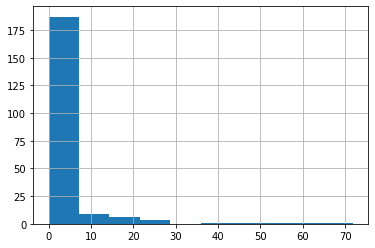

In [11]:
df['alpha'].hist()

## Transforming data

* **Goal**: "normalize" powers distribution
* boolean indexing/masking/filtering
* `.apply`
* seaborn: `distplot`
*  interpretting results, building hypotheses

In [12]:
# df['alpha'].apply('log').hist() - ERROR: ValueError: supplied range of [-inf, 4.274352944972556] is not finite

In [13]:
(df['alpha'] == 0).any()

True

In [14]:
(df['alpha'] == 0).sum()

1

In [15]:
df_clean = df[df['alpha'] != 0]

In [16]:
df_clean.describe()

,alpha,delta,beta,gamma
count,209.000000,209.000000,209.000000,209.000000
mean,3.912142,74.890926,0.642284,0.115570
std,9.326172,262.948432,0.861629,0.182521
min,0.000158,0.000015,0.000148,0.000042
25%,0.073211,0.131024,0.058587,0.026475
50%,1.277136,6.034582,0.357372,0.078369
75%,3.646044,48.838389,0.969071,0.151109
max,71.833644,2933.818633,7.587283,2.111892


<AxesSubplot:>

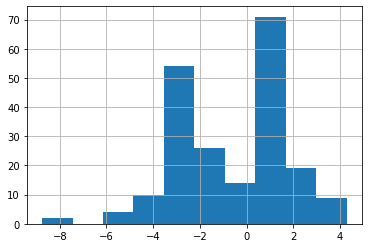

In [17]:
(df_clean['alpha'].apply('log').hist())

In [18]:
import seaborn as sns

/home/bartosz/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alpha', ylabel='Density'>

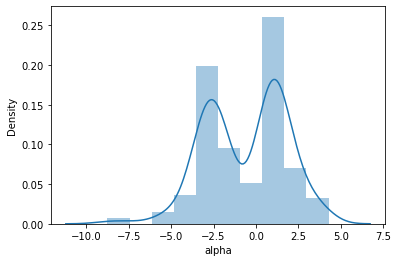

In [19]:
sns.distplot(a=df_clean['alpha'].apply('log'))

In [20]:
df_transformed = df_clean.copy()
df_transformed['alpha'] = df_clean['alpha'].apply('log')

df_transformed['delta'] = df_clean['delta'].apply('log')
df_transformed['beta'] = df_clean['beta'].apply('log')
df_transformed['gamma'] = df_clean['gamma'].apply('log')

In [21]:
df_transformed

,alpha,delta,beta,gamma,state,channel,subject
0,-2.214683,-2.106715,-1.715645,-3.191958,focused,AF3,subject_5
1,-2.478376,-2.539694,-2.598762,-3.260806,unfocused,AF3,subject_5
2,-3.339396,-2.207430,-3.243676,-4.120173,drowsy,AF3,subject_5
3,0.656078,3.590592,-0.113803,-1.545552,focused,F7,subject_5
4,0.564483,3.597481,-0.526738,-1.810513,unfocused,F7,subject_5
...,...,...,...,...,...,...,...
205,-3.469193,-2.195682,-2.830449,-3.509048,unfocused,F8,subject_33
206,-2.572097,-1.194097,-3.146518,-3.616630,drowsy,F8,subject_33
207,0.495099,4.469770,-0.107089,-1.551568,focused,AF4,subject_33
208,1.291949,3.637969,-1.028978,-2.410300,unfocused,AF4,subject_33


## Scatter plots

*  **Goal**: identify dependencies between continous variables (powers)
* `.plot.scatter` or `.plot(kind='scatter', ...)`
* refine hypotheses

<AxesSubplot:xlabel='alpha', ylabel='gamma'>

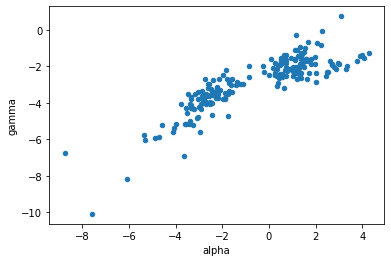

In [22]:
df_transformed.plot.scatter(x='alpha', y='gamma')

In [23]:
df_focused = df_transformed[df_transformed['state'] == 'focused']
df_unfocused = df_transformed[df_transformed['state'] == 'unfocused']
df_drowsy = df_transformed[df_transformed['state'] == 'drowsy']

<AxesSubplot:xlabel='alpha', ylabel='gamma'>

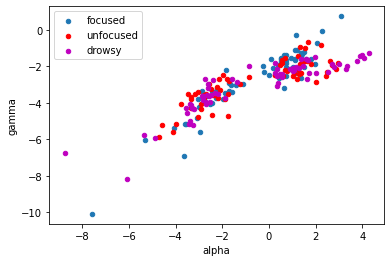

In [24]:
ax = df_focused.plot.scatter(x='alpha', y='gamma', label='focused')
df_unfocused.plot.scatter(x='alpha', y='gamma', c='r', ax=ax, label='unfocused')
df_drowsy.plot.scatter(x='alpha', y='gamma', c='m', ax=ax, label='drowsy')

## Compare groups

* **Goal**: 
  - 1) explore dependencies between categorical and continuous variables 
  - 2) identify causes for underlying variability in CV (stratification)
* `.groupby`
* transposition, `.T`
* `.plot.bar`
* `sns.boxplot`
* **Excercise**: powers vs electrodes

In [25]:
df_transformed['subject'].unique()

array(['subject_5', 'subject_10', 'subject_20', 'subject_25',
       'subject_33'], dtype=object)

In [26]:
df_mean_power = df_transformed.groupby('subject').mean()

In [27]:
df_mean_transposed = df_mean_power.T

<AxesSubplot:xlabel='subject'>

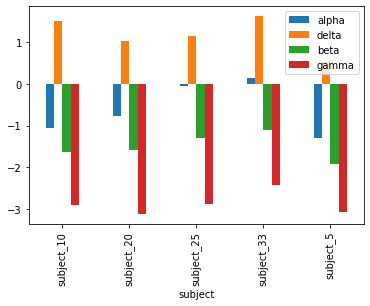

In [28]:
df_mean_power.plot.bar()

<AxesSubplot:>

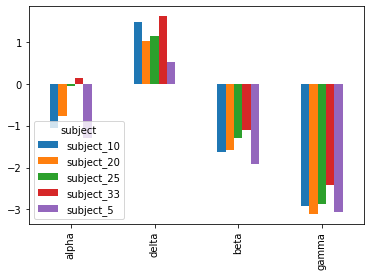

In [29]:
df_mean_transposed.plot.bar()

In [30]:
# url = 'https://bit.ly/3BTE0A1'
url ='eeg_powers.csv'
df = pd.read_csv(url, index_col=0)

df_clean = df[df['alpha'] != 0]

df_transformed = df_clean.copy()
df_transformed['alpha'] = df_clean['alpha'].apply('log')

df_transformed['delta'] = df_clean['delta'].apply('log')
df_transformed['beta'] = df_clean['beta'].apply('log')
df_transformed['gamma'] = df_clean['gamma'].apply('log')



<AxesSubplot:xlabel='channel', ylabel='gamma'>

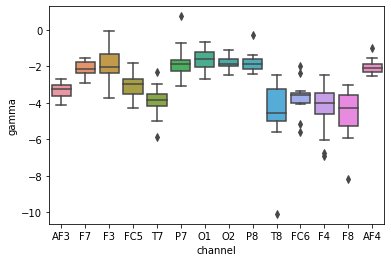

In [31]:
sns.boxplot(data=df_transformed, x='channel', y='gamma')

<AxesSubplot:xlabel='subject', ylabel='gamma'>

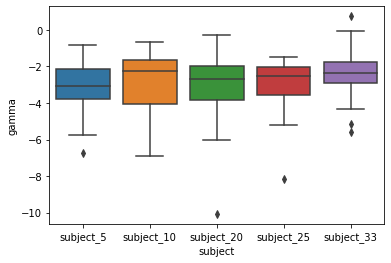

In [32]:
sns.boxplot(data=df_transformed, x='subject', y='gamma')

In [33]:
high_channels = ['P7', 'O1', 'O2', 'P8', 'AF4', 'F3', 'F7']

In [34]:
df_high = df_transformed[df_transformed['channel'].isin(high_channels)]
df_low = df_transformed[~df_transformed['channel'].isin(high_channels)]

<AxesSubplot:xlabel='gamma', ylabel='alpha'>

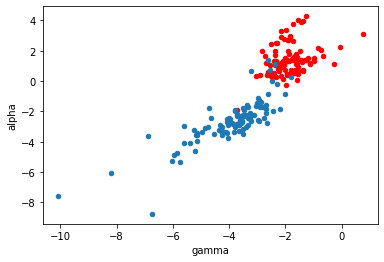

In [35]:
ax = df_high.plot.scatter(x='gamma', y='alpha', c='r')
df_low.plot.scatter(x='gamma', y='alpha', ax=ax)

## Tidy data (advanced)

* **Goal**: Combine multiple data dimensions in one graph (2 cat and 1 CV)
* tidy data
* pandas `df.melt`
* `sns.boxplot(data= , x=, y=, hue=)`

In order to plot different freq bands and states on the same graphy, we need to reformat the data in the [tidy (long) format](https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data). For example, we will use it to plot boxplots with mutliple bar hues: https://seaborn.pydata.org/generated/seaborn.boxplot.html 

## Splitting data

* **Goal**: split data into distinct groups based on data (stratification)
* boolean indexing
* `.isin`
* `sns.pairplot`

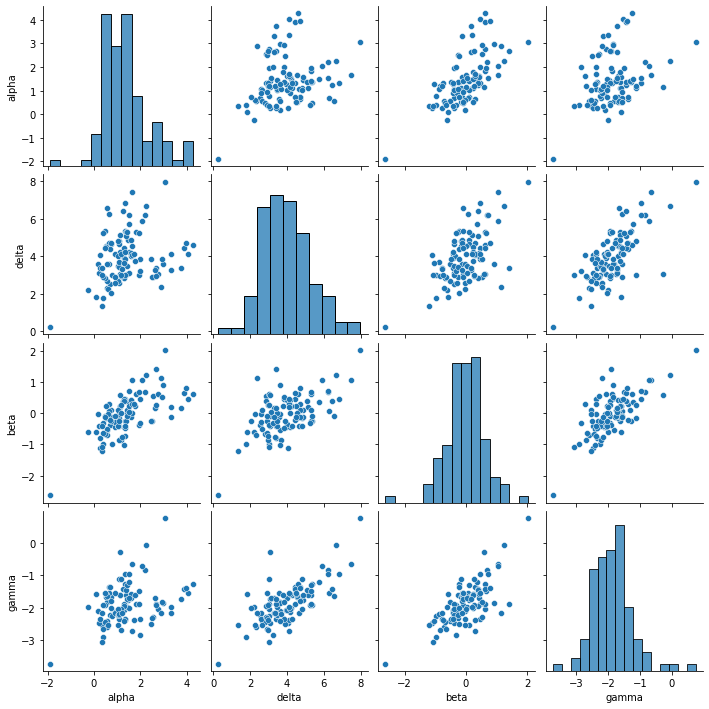

In [36]:
sns.pairplot(data=df_high)

## Visualising correlations

* **Goal**: Analyse correlations in stratified data
* `sns.pairplot`
* `df.corr`
* `sns.heatmap`

In [37]:
df_corr = df_high[['delta', 'alpha', 'beta', 'gamma']].corr()

<AxesSubplot:>

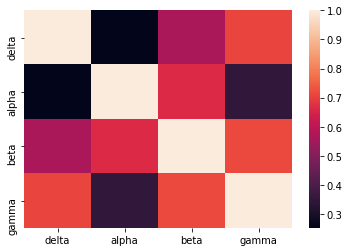

In [38]:
sns.heatmap(df_corr)

## Statistics (advanced)

* **Goal**: Look for differences in powers in different states
* statsmodels
* `statsmodels.formula.api.ols`
* `statsmodels.api.stats.anova_lm`

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Clustering (advanced)

* **Goal**: unsupervised learning
* sklearn
* `sklearn.cluster.KMeans`
* `.fit`, `labels_`
* plotting multiple graphs in the same axes

In [40]:
from sklearn import cluster

## Groupby revisited

* **Goal**: plot number of channel recordings belonging to each cluster (subjects and states confounded)
* `.value_counts`